In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_science_qualitative.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

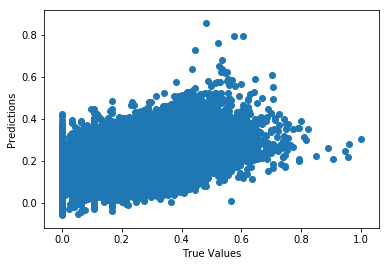

[  6.69014115e-10  -7.69443460e-04  -9.32183821e-04   4.04051101e-03
   2.62497455e-03   3.25864719e-03  -2.51063888e-03  -3.57657490e-05
   2.52777019e-04  -1.24198668e-04   9.28978399e-04   7.97229306e-04
  -3.84612385e-04  -3.65885127e-04   3.06686822e-05   7.23237266e-03
  -1.67114665e-03   2.94469521e-02   1.32362976e-01  -1.01780482e+02
  -4.81166288e+00  -4.83988509e+03   2.50856956e+03  -1.30221140e-02
   6.64566316e-01  -2.49766620e-05   2.67822177e-05  -1.04452203e-01
   1.57480305e-01   2.06497113e+02  -2.41830851e+00   1.83132140e-01
  -2.22222391e-01  -1.11466793e-02  -1.25468278e-03  -1.08160717e-03]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.36868433  0.37341965  0.35915541  0.38380927  0.38123198  0.37092385
  0.40158032  0.37203511  0.37591155  0.4161984 ]


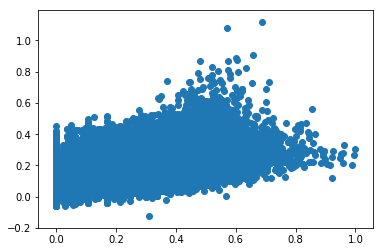

In [7]:
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)
plt.show()

In [8]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.381139336283


In [9]:
print(lm.coef_)

[  6.69014115e-10  -7.69443460e-04  -9.32183821e-04   4.04051101e-03
   2.62497455e-03   3.25864719e-03  -2.51063888e-03  -3.57657490e-05
   2.52777019e-04  -1.24198668e-04   9.28978399e-04   7.97229306e-04
  -3.84612385e-04  -3.65885127e-04   3.06686822e-05   7.23237266e-03
  -1.67114665e-03   2.94469521e-02   1.32362976e-01  -1.01780482e+02
  -4.81166288e+00  -4.83988509e+03   2.50856956e+03  -1.30221140e-02
   6.64566316e-01  -2.49766620e-05   2.67822177e-05  -1.04452203e-01
   1.57480305e-01   2.06497113e+02  -2.41830851e+00   1.83132140e-01
  -2.22222391e-01  -1.11466793e-02  -1.25468278e-03  -1.08160717e-03]
